In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from BaseModels import PreActResNet18
from Boosting import pytorch_predict
from torchvision import datasets, transforms

In [2]:
num_weak_learners = 10

In [3]:
dataset = datasets.CIFAR10
train_loader = torch.utils.data.DataLoader(
        dataset('./data', train=True, download=True, transform=transforms.Compose([
            transforms.ToTensor(),
            ])),
        batch_size=100, shuffle=False)
test_loader = torch.utils.data.DataLoader(
        dataset('./data', train=False, download=True, transform=transforms.Compose([
            transforms.ToTensor(),
            ])),
        batch_size=100, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
def evaluate(model, loader):
    total = len(loader)
    y_true, y_pred, _ = pytorch_predict(model, loader, torch.device('cuda'))
    accuracy= (y_true == y_pred).sum() / total
    return accuracy

In [5]:

val_accuracies = []
train_accuracies = []
for i in range(num_weak_learners):
    print(f"Weak learner {(i + 1)}")
    model_file = f"models/cifar10_wl_{i}.pth"
    model = PreActResNet18().cuda()
    model.load_state_dict(torch.load(model_file))
    model.eval()
#     train_predictions = pytorch_predict
    train_accuracies.append(evaluate(model, train_loader))
    val_accuracies.append(evaluate(model, test_loader))
        
    
    

Weak learner 1
Weak learner 2
Weak learner 3
Weak learner 4
Weak learner 5
Weak learner 6
Weak learner 7
Weak learner 8
Weak learner 9
Weak learner 10


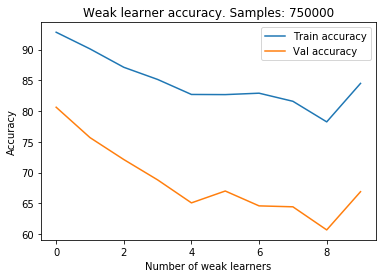

In [8]:
weak_learners = list(range(10))
plt.subplots()
plt.plot(weak_learners, train_accuracies)
plt.plot(weak_learners, val_accuracies)
plt.xlabel("Number of weak learners")
plt.ylabel("Accuracy")
plt.title("Weak learner accuracy. Samples: 750000")
plt.legend(['Train accuracy', 'Val accuracy'])